In [303]:
from Images import Images
from SIFT import SIFT
from Matcher import Matcher
from CV import CvHelper

import cv2
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [315]:
imgs = Images()
imgs.read_imgs_from_folder("buddha_images/", resize_factor = 1, show_imgs=False)

In [305]:
sift = SIFT()
sift.create_detector()
keypoints, descriptors = sift.detect_keypoints(imgs.gray, imgs.num_imgs, plot=False)

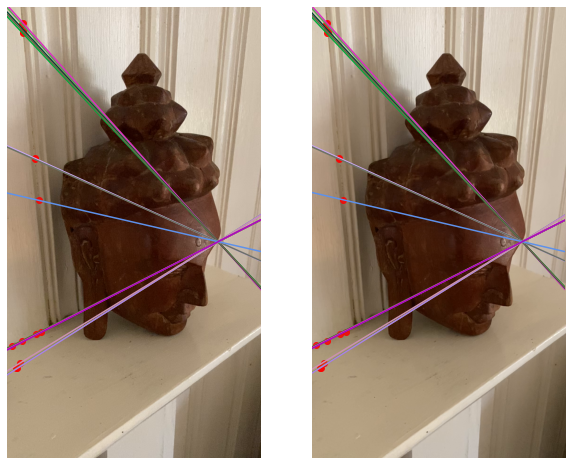

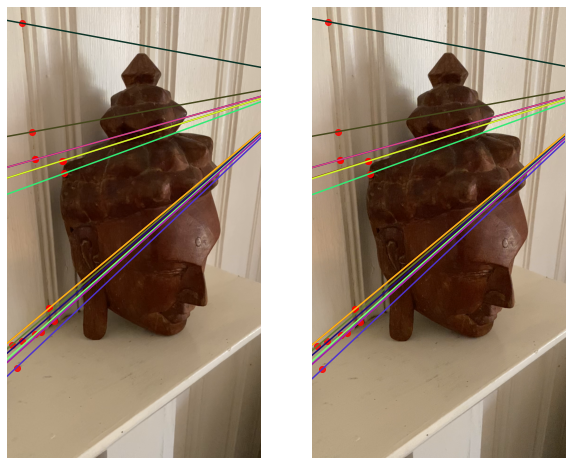

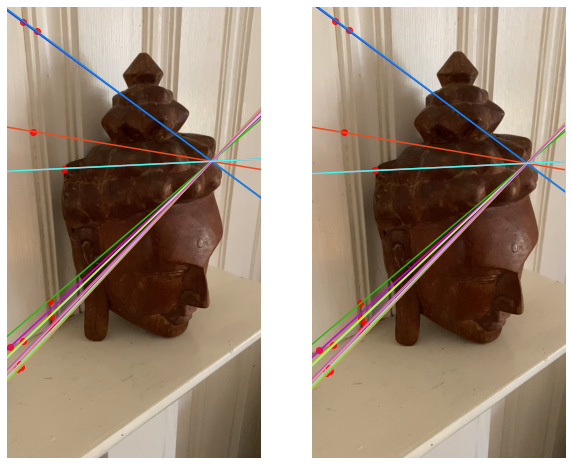

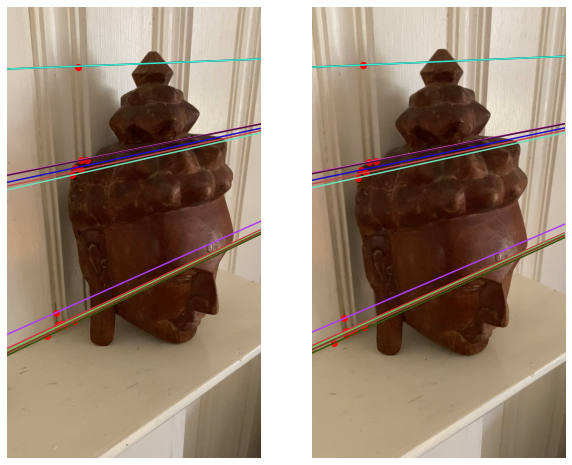

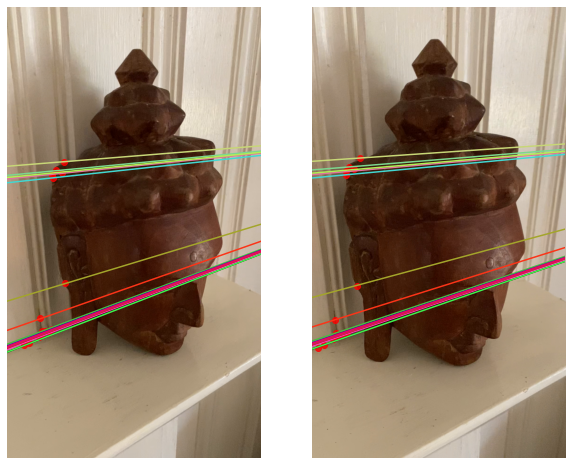

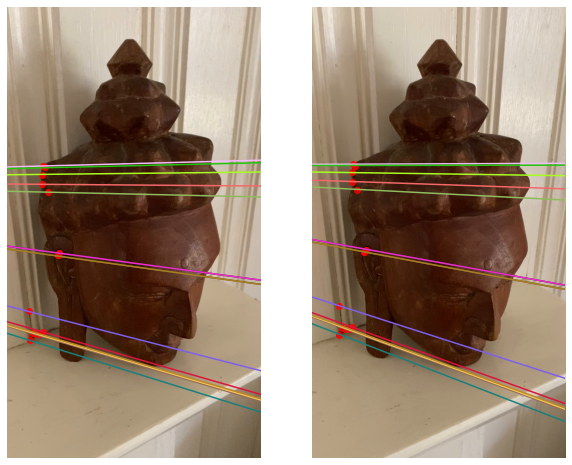

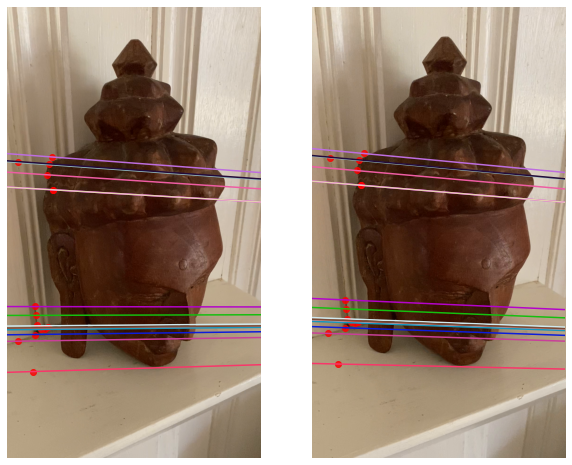

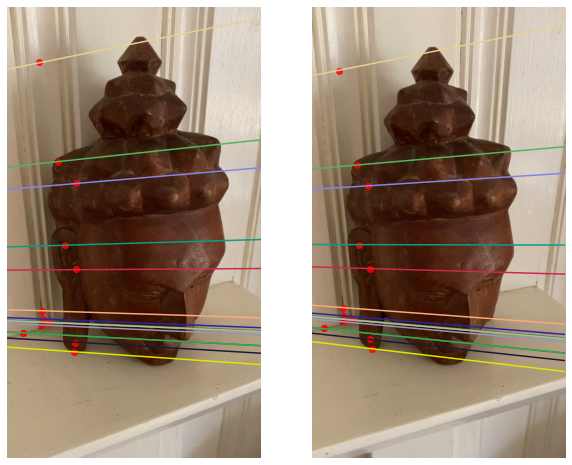

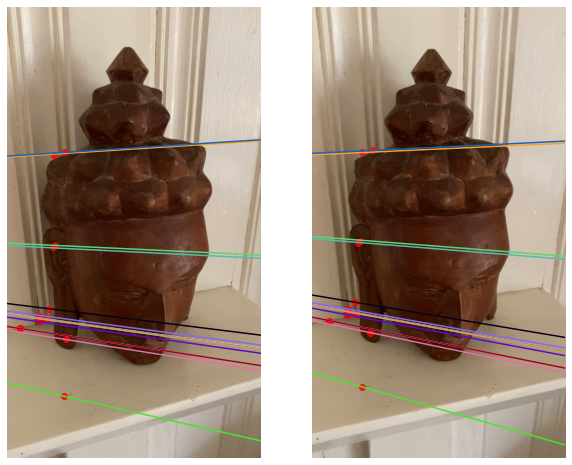

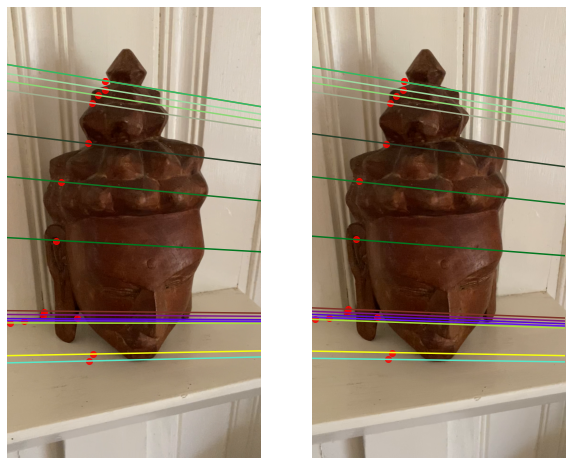

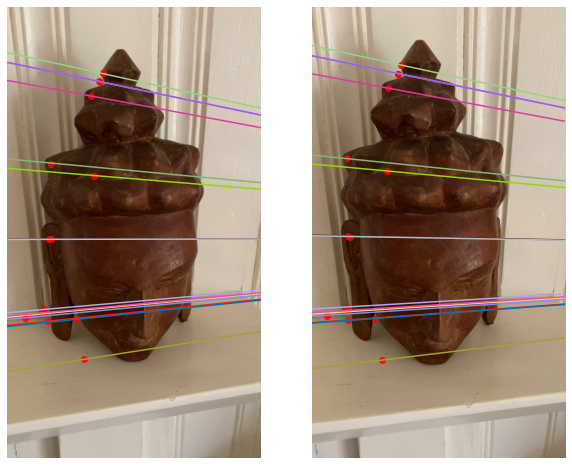

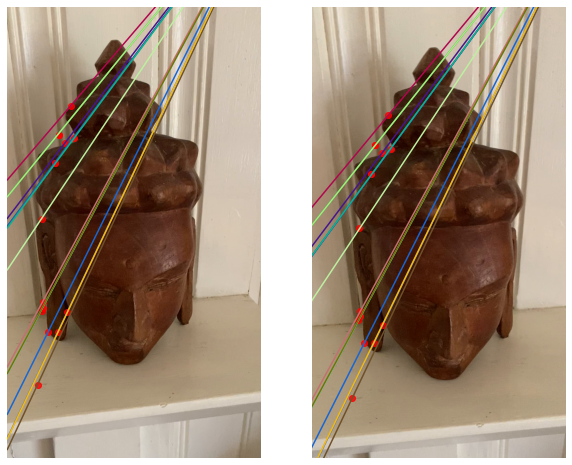

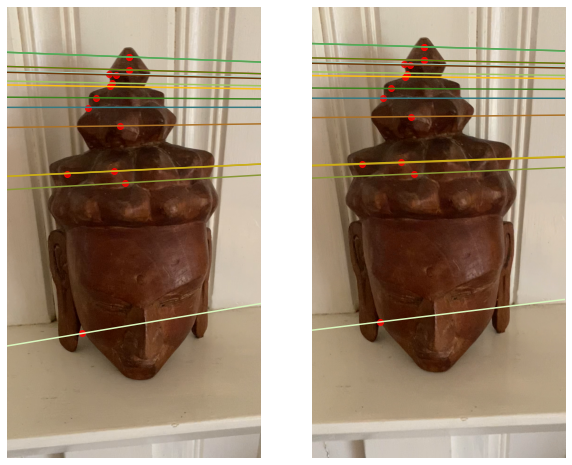

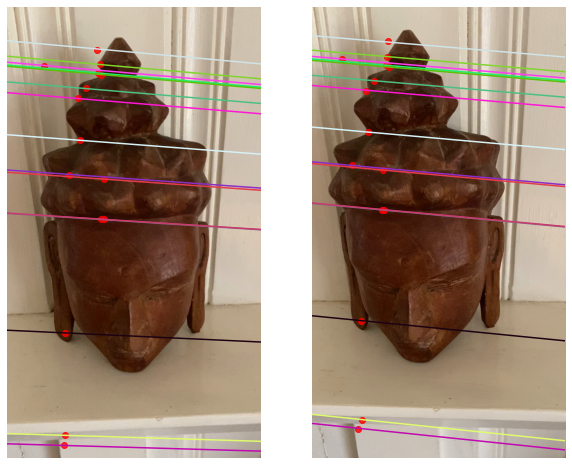

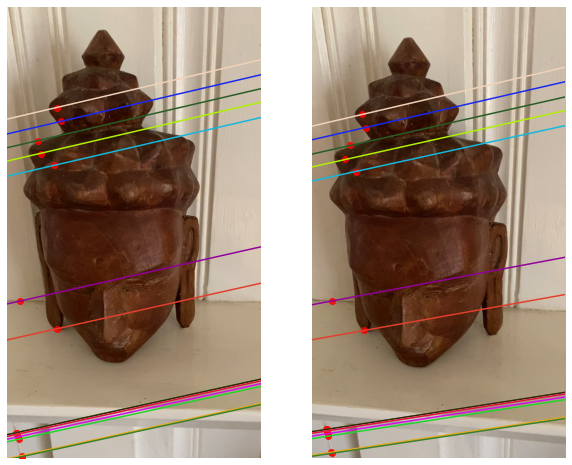

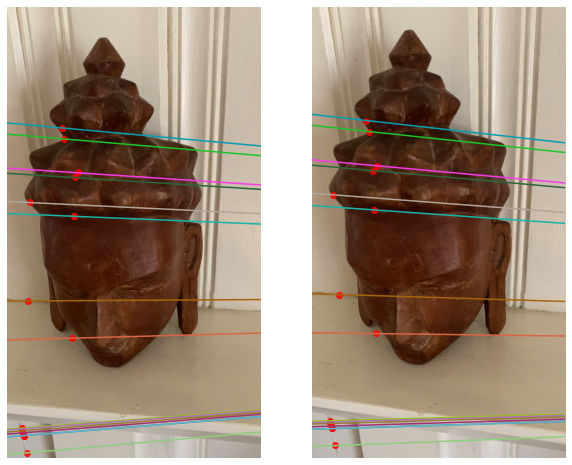

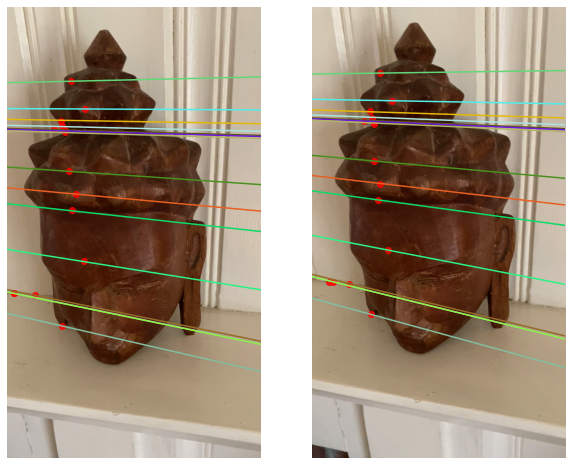

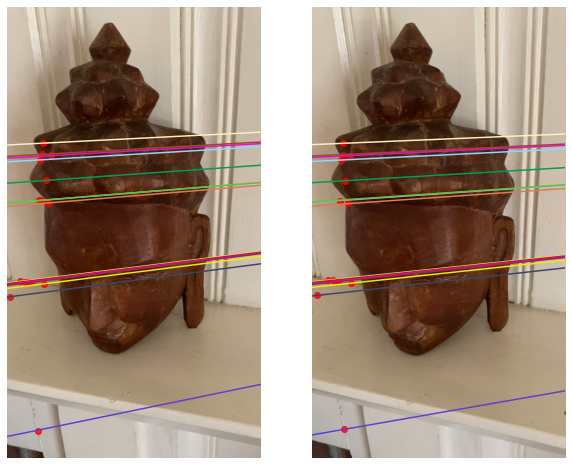

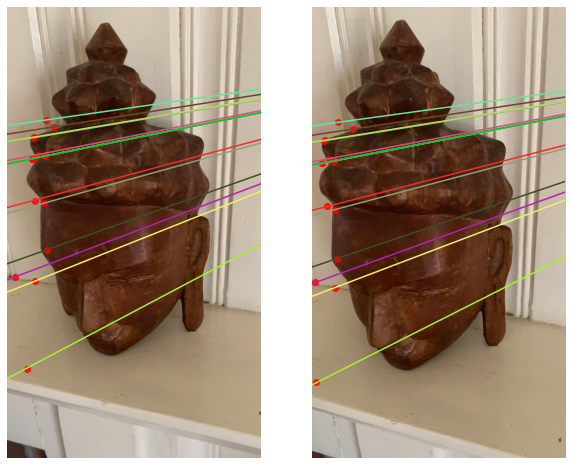

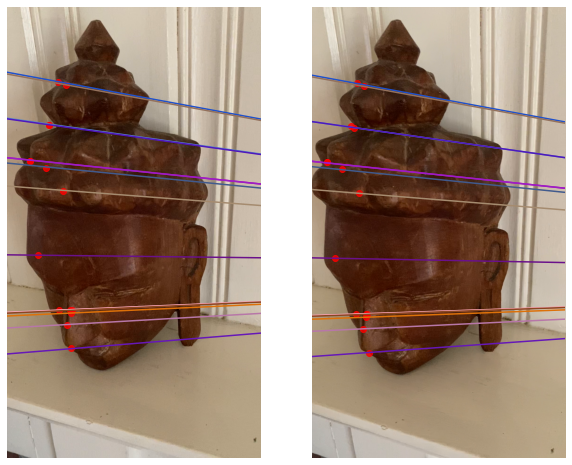

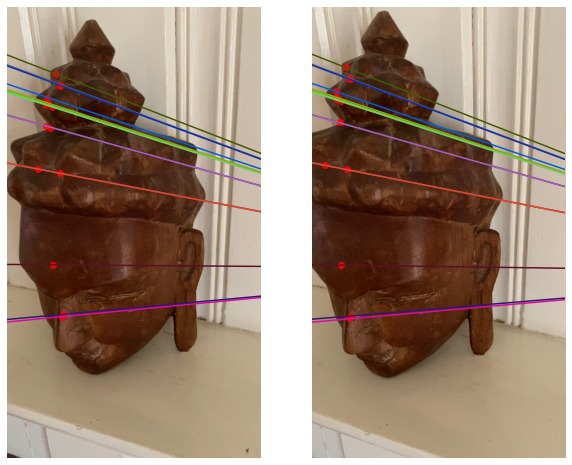

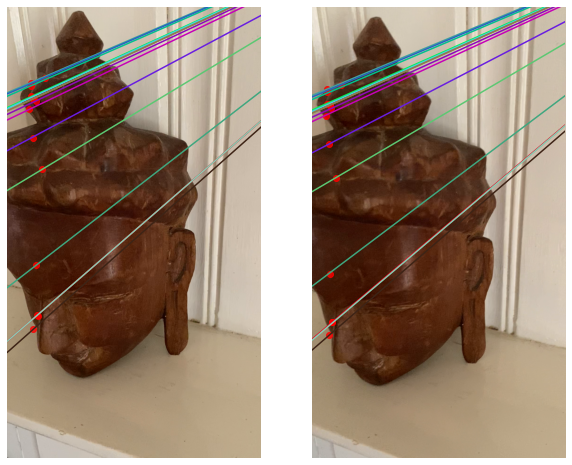

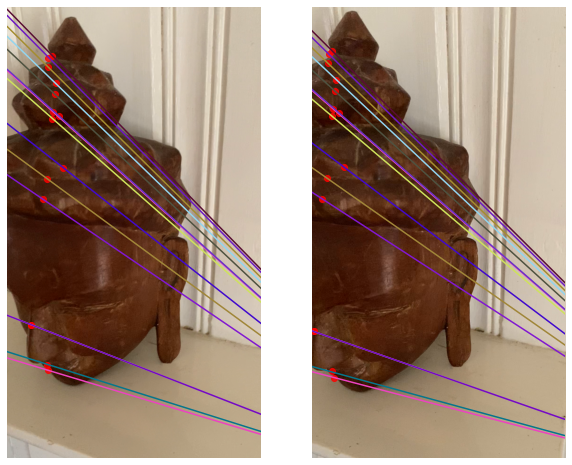

In [333]:
matcher = Matcher(imgs=imgs.rgb, keypoints=keypoints, descriptors=descriptors)

for idx in range(imgs.num_imgs-1):
    src_idx = idx
    dst_idx = idx + 1

    src_points, dst_points, good_matches = matcher.match_features(src_idx, dst_idx, False)
    F, inlier_mask, src_inliers, dst_inliers = CvHelper.get_fundamental_mat(src_points, dst_points)
    
    CvHelper.draw_epipolar_lines(src_inliers, dst_inliers, F, imgs.rgb[src_idx], imgs.rgb[dst_idx], max_lines = 15)

    # matcher.draw_inliers(inlier_mask, good_matches, src_idx, dst_idx)

In [280]:
dst_inliers[:,0,0]

array([ 22.524097,  42.58587 ,  32.192036,  39.69413 ,  34.58342 ,
        41.545883,  43.296146,  44.17698 ,  44.87657 ,  44.03765 ,
        45.922253,  46.83161 ,  49.175396,  69.03907 ,  69.03907 ,
        75.15881 ,  86.728745,  96.502754,  96.502754,  84.88743 ,
        90.371506,  90.94511 , 100.6349  , 101.84578 , 103.70626 ,
        94.791855, 107.321625,  99.26639 ,  98.83064 , 109.33793 ,
       110.351524, 110.68438 , 116.13154 , 112.36    , 120.47103 ,
       122.8121  , 122.8121  , 126.16918 , 135.89354 , 135.01744 ,
       137.99539 , 141.265   , 142.27226 , 142.27226 , 141.59132 ,
       143.11005 , 148.08124 , 148.31407 , 150.13638 , 158.45355 ,
       157.03256 , 161.76762 , 162.68848 , 161.53236 , 173.06665 ,
       178.3797  , 178.96898 , 178.96898 , 186.84702 , 187.189   ,
       187.189   , 192.56647 , 195.66318 , 199.68192 , 206.08778 ,
       234.40811 , 266.41904 , 277.16867 , 277.16867 , 278.96167 ,
       278.96167 , 275.35876 , 283.24457 , 282.16376 , 288.413

In [299]:
K = np.array([[1.97547873e+03, 0.00000000e+00, 1.06077279e+03],
              [0.00000000e+00, 2.05341424e+03, 5.13500761e+02],
              [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

E = K.T@F@K

In [300]:
points, R, t, mask = cv2.recoverPose(E, src_inliers, dst_inliers, K)

In [302]:
t

array([[ 0.09995097],
       [-0.21962915],
       [-0.97044981]])

In [284]:
cv2.findEssentialMat(src_points, dst_points)

(array([[-4.61580364e-06,  3.01167281e-04, -1.43102107e-01],
        [-2.66177067e-04, -1.50057854e-05,  6.92475064e-01],
        [ 1.38694857e-01, -6.93371219e-01, -2.32296831e-05]]),
 array([[0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [